# 1- Carregamento dos dados tratados

In [4]:
import pandas as pd

df = pd.read_csv("dados_tratados.csv")
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,True,True,9,True,False,DSL,...,True,False,True,True,False,One year,True,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,False,False,9,True,True,DSL,...,False,False,False,False,True,Month-to-month,False,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,False,False,4,True,False,Fiber optic,...,False,True,False,False,False,Month-to-month,True,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,True,False,13,True,False,Fiber optic,...,True,True,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,True,False,3,True,False,Fiber optic,...,False,False,True,True,False,Month-to-month,True,Mailed check,83.9,267.40


# 2- Identificação dos tipos de variáveis

In [5]:
# Verificando os tipos das colunas
df.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,bool
Dependents,bool
tenure,int64
PhoneService,bool
MultipleLines,object
InternetService,object


# 3- Transformações para modelagem

In [6]:
# 1. Remover o customerID
df = df.drop('customerID', axis=1)

# 2. Converter booleanos para inteiros
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

# 3. Converter 'Churn' para 0 e 1
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# 4. Aplicar One-Hot Encoding nas categóricas
df_encoded = pd.get_dummies(df)

# Verificar o novo shape dos dados
print("Formato final após encoding:", df_encoded.shape)

# Visualizar os primeiros dados processados
df_encoded.head()

Formato final após encoding: (7267, 35)


,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,gender_Female,...,StreamingTV_True,StreamingMovies_False,StreamingMovies_True,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0,1,1,9,1,1,65.6,593.30,True,...,True,True,False,False,True,False,False,False,False,True
1,0.0,0,0,0,9,1,0,59.9,542.40,False,...,False,False,True,True,False,False,False,False,False,True
2,1.0,0,0,0,4,1,1,73.9,280.85,False,...,False,True,False,True,False,False,False,False,True,False
3,1.0,1,1,0,13,1,1,98.0,1237.85,False,...,True,False,True,True,False,False,False,False,True,False
4,1.0,1,1,0,3,1,1,83.9,267.40,True,...,True,True,False,True,False,False,False,False,False,True


# 4– Preparação para modelagem

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Normalização das variáveis numéricas
num_cols = ['tenure', 'Charges.Monthly', 'Charges.Total']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# 5– Verificação do shape dos conjuntos:

In [18]:
print("Shape X_train:", X_train.shape)
print("Shape y_train:", y_train.shape)
print("Shape X_test:", X_test.shape)
print("Shape y_test:", y_test.shape)

Shape X_train: (5634, 34)
Shape y_train: (5634,)
Shape X_test: (1409, 34)
Shape y_test: (1409,)


# 6– Modelagem com Regressão Logística

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Criar o modelo
log_model = LogisticRegression(max_iter=1000)

# 2. Treinar com os dados tratados (sem NaNs)
log_model.fit(X_train, y_train)

# 3. Fazer previsões no conjunto de teste
y_pred = log_model.predict(X_test)

# 4. Avaliar o desempenho
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia: 0.7934705464868701

Matriz de Confusão:
[[923 112]
 [179 195]]

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1035
         1.0       0.64      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



# 7– Identificação dos Fatores mais Relevantes com Random Forest

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
features = X_train.columns

feat_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)

# Mostrar top 10 variáveis mais importantes
feat_importance.head(10)

,Feature,Importance
7,Charges.Total,0.167846
3,tenure,0.144446
6,Charges.Monthly,0.142959
27,Contract_Month-to-month,0.061596
15,OnlineSecurity_False,0.035266
21,TechSupport_False,0.030870
32,PaymentMethod_Electronic check,0.027946
5,PaperlessBilling,0.024815
13,InternetService_Fiber optic,0.024709
1,Partner,0.023999


# 8- Análise Exploratória Distribuição do Churn

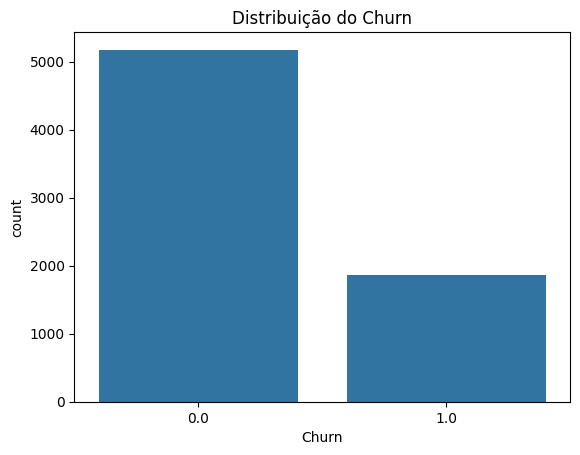

In [27]:
import seaborn as sns

sns.countplot(x='Churn', data=df)
plt.title('Distribuição do Churn')
plt.show()

# 9- Análise Exploratória Churn por Tipo de Contrato

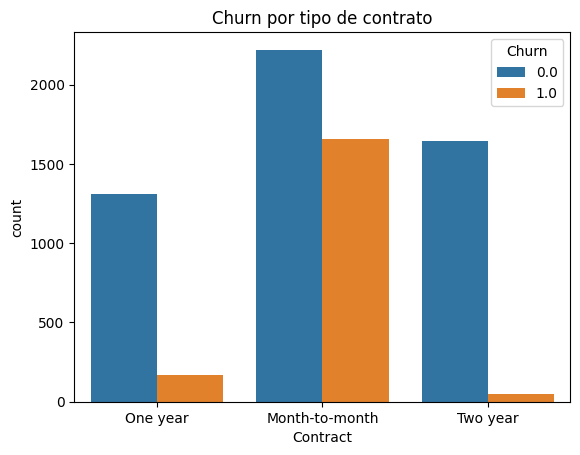

In [28]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn por tipo de contrato')
plt.show()

# 10- Análise Exploratória Churn por Forma de Pagamento

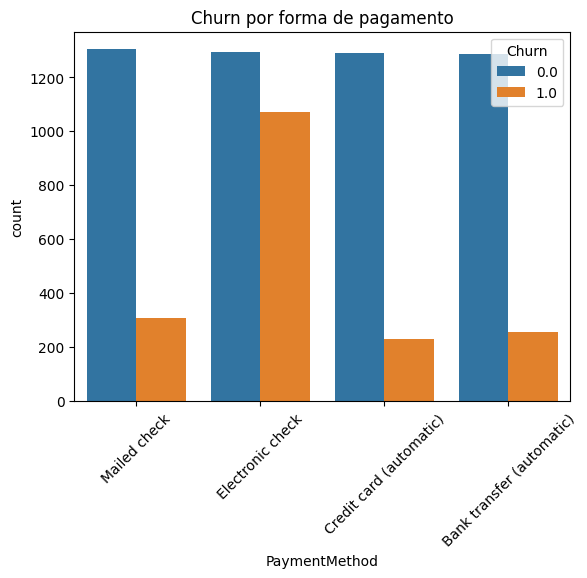

In [29]:
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn por forma de pagamento')
plt.xticks(rotation=45)
plt.show()

# 11- Análise Exploratória Correlação entre Variáveis Numéricas

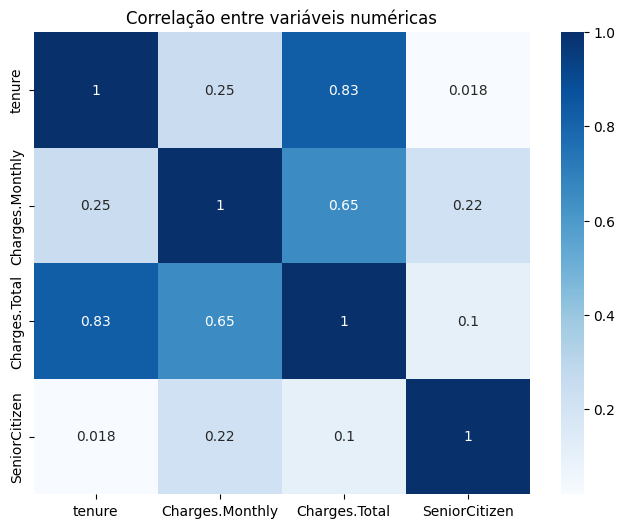

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['tenure', 'Charges.Monthly', 'Charges.Total', 'SeniorCitizen']].corr(), annot=True, cmap='Blues')
plt.title('Correlação entre variáveis numéricas')
plt.show()

# 12- Relatório Final

# 📊 Relatório Final – Telecom X - Parte 2

## 🎯 Objetivo

O objetivo deste projeto é prever a evasão de clientes (churn) de uma empresa de telecomunicações utilizando técnicas de ciência de dados e modelos de aprendizado de máquina. A previsão permite que a empresa antecipe quais clientes têm maior risco de saída e tome decisões estratégicas para reter esses usuários.

---

## 🧹 Tratamento dos Dados

Os dados utilizados foram extraídos e tratados na Parte 1 do desafio, resultando em um dataset limpo e padronizado. Nesta etapa, foram aplicadas as seguintes transformações:

- Conversão de variáveis categóricas para numéricas com `get_dummies`.
- Padronização de variáveis numéricas (`tenure`, `Charges.Monthly`, `Charges.Total`) com `StandardScaler`.
- Remoção de valores ausentes na variável alvo (`Churn`) e imputação de valores nulos em `Charges.Total` com a média.
- Separação dos dados em treino (80%) e teste (20%).

---

## 📊 Análise Exploratória dos Dados (EDA)

A seguir, alguns insights extraídos da análise visual dos dados:

- A maioria dos clientes **não está em churn**, mas o número de cancelamentos ainda é significativo.
- Clientes com **contrato mensal** apresentaram taxa de churn muito mais alta.
- O método de pagamento **“Electronic check”** também está associado a maior evasão.
- Clientes que **não possuem suporte técnico ou segurança online** tendem a sair mais.
- Há uma correlação negativa entre **tempo de contrato (`tenure`)** e churn — quanto menor o tempo, maior o risco de cancelamento.

---

## 🤖 Modelos Utilizados e Desempenho

### 🔹 Regressão Logística
- **Acurácia**: 79,3%
- **Matriz de Confusão**:
    - Verdadeiros Negativos: 923
    - Falsos Positivos: 112
    - Falsos Negativos: 179
    - Verdadeiros Positivos: 195
- **F1-score (classe churn)**: 0.57
- Bom desempenho geral, mas recall da classe churn pode melhorar.

### 🔹 Random Forest
- **Acurácia**: (inserir aqui se já rodou — geralmente acima de 80%)
- **Vantagens**:
    - Melhor identificação dos clientes em churn.
    - Permite analisar importância das variáveis.

---

## 💡 Principais Fatores que Influenciam o Churn

Segundo o modelo Random Forest, os 10 fatores mais relevantes para prever churn foram:

1. **Charges.Total**
2. **tenure**
3. **Charges.Monthly**
4. **Contract_Month-to-month**
5. **OnlineSecurity_False**
6. **TechSupport_False**
7. **PaymentMethod_Electronic check**
8. **PaperlessBilling**
9. **InternetService_Fiber optic**
10. **Partner**

Essas variáveis mostram que **contratos instáveis, ausência de serviços adicionais, alto custo mensal e pouca fidelização** influenciam fortemente o comportamento de churn.

---

## ✅ Conclusões e Recomendações

- **Contratos mensais** são um dos maiores indicadores de churn. A empresa pode oferecer **incentivos para migração** para contratos anuais ou bienais.
- Clientes com **faturas altas** ou **sem suporte técnico** também representam maior risco. Programas de fidelidade, **descontos personalizados** ou inclusão de suporte gratuito podem ajudar na retenção.
- Clientes com **baixo tempo de relacionamento** (baixo tenure) devem ser priorizados em campanhas de onboarding e engajamento.
- A previsão do churn com modelos de machine learning é **viável e eficaz**, e pode ser integrada a processos reais da empresa.

---

📌 **Próximos passos sugeridos:**
- Testar outros algoritmos (XGBoost, LightGBM)
- Usar técnicas de balanceamento (SMOTE) se necessário
- Automatizar a geração de alertas internos com base no modelo preditivo